In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = 'train'
valid_path = 'validation'

In [ ]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in xception.layers:
    layer.trainable = False

In [ ]:

folders = glob('C:\\Users\\HOME\\Desktop\\train\\*')

In [ ]:
folders

['C:\\Users\\HOME\\Desktop\\train\\Healthy',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Bacterial blight',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Blast',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Brownspot',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Tungro',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Bacterial blight',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Blast',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Brownspot',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Tungro']

In [ ]:

x = Flatten()(xception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=xception.input, outputs=prediction)

In [ ]:
prediction

<KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'dense')>

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('Desktop/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2826 images belonging to 9 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Desktop/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 180 images belonging to 9 classes.


In [ ]:
test_set.filenames

['Healthy\\IMG_20190419_172952.jpg',
 'Healthy\\IMG_20190419_173344.jpg',
 'Healthy\\IMG_20190419_173904.jpg',
 'Healthy\\IMG_20190419_174133.jpg',
 'Healthy\\IMG_20190419_174218.jpg',
 'Healthy\\IMG_20190419_174308.jpg',
 'Healthy\\IMG_20190420_193425.jpg',
 'Healthy\\IMG_20190420_194105.jpg',
 'Healthy\\IMG_20190420_194338.jpg',
 'Healthy\\IMG_20190420_200326.jpg',
 'Healthy\\IMG_20190420_200436.jpg',
 'Healthy\\IMG_20190420_200508.jpg',
 'Healthy\\IMG_20190421_195322.jpg',
 'Healthy\\IMG_20190424_125921.jpg',
 'Healthy\\IMG_20190424_130047.jpg',
 'Healthy\\IMG_20190424_130138.jpg',
 'Healthy\\IMG_20190424_130226.jpg',
 'Healthy\\IMG_20190424_130350.jpg',
 'Healthy\\IMG_20190424_130430.jpg',
 'Healthy\\IMG_20190424_130546.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_167.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_183.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_187.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_191.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_192.jpg',


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HOME\AppData\Local\Temp\ipykernel_13284\1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
89/89 [==============================] - 258s 3s/step - loss: 2.2292 - accuracy: 0.6978 - val_loss: 1.0519 - val_accuracy: 0.8389
Epoch 2/50
89/89 [==============================] - 231s 3s/step - loss: 1.2299 - accuracy: 0.8457 - val_loss: 0.9147 - val_accuracy: 0.8444
Epoch 3/50
89/89 [==============================] - 228s 3s/step - loss: 1.0899 - accuracy: 0.8691 - val_loss: 1.2022 - val_accuracy: 0.8278
Epoch 4/50
89/89 [==============================] - 236s 3s/step - loss: 1.1626 - accuracy: 0.8896 - val_loss: 1.4237 - val_accuracy: 0.8611
Epoch 5/50
89/89 [==============================] - 229s 3s/step - loss: 1.1567 - accuracy: 0.8846 - val_loss: 0.4445 - val_accuracy: 0.9444
Epoch 6/50
89/89 [==============================] - 224s 3s/step - loss: 1.2241 - accuracy: 0.8850 - val_loss: 1.3279 - val_accuracy: 0.8722
Epoch 7/50
89/89 [==============================] - 3121s 35s/step - loss: 1.2145 - accuracy: 0.8988 - val_loss: 0.7659 - val_accuracy: 0.9278
Epoch 8/50


In [ ]:
import matplotlib.pyplot as plt

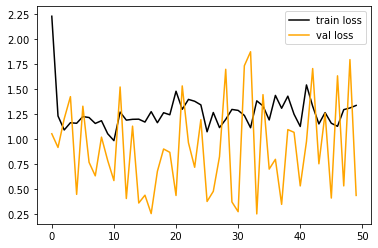

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="orange")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




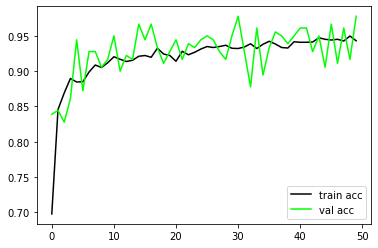

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="lime")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

from tensorflow.keras.models import load_model

model.save('model_xception.h5')

In [ ]:
model=load_model('model_xception.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

6/6 [==============================] - 13s 2s/step


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 3, 7, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8], dtype=int64)

In [ ]:
import os
path ='desktop/validation'
Diseases_types=os.listdir(path)

In [ ]:
diseases = []
for i in Diseases_types:
  all_images = os.listdir(path + '/' +i)

  for j in all_images :
    diseases.append((i))
    print (diseases)

['Healthy']
['Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy

In [ ]:
diseases

['Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',


In [ ]:
from sklearn.preprocessing import LabelEncoder
diseases = np.array(diseases)
diseases.reshape(180,-1)
y_labelencoder = LabelEncoder()



In [ ]:
diseases

array(['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild Blast', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild Blast', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild B

In [ ]:
y_test = y_labelencoder.fit_transform (diseases)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 19,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        20
           3       0.95      0.95      0.95        20
           4       1.00      1.00      1.00        20
           5       1.00      0.95      0.97        20
           6       0.95      1.00      0.98        20
           7       0.95      0.95      0.95        20
           8       1.00      1.00      1.00        20

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9466666666666667

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='micro')

0.9777777777777777

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777777777777777

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.9777777777777777

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='micro')

0.9777777777777777

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Healthy','Mild Bacterial blight','Mild Blast','Mild Brownspot','Mild Tungro','Severe Bacterial blight','Severe Blast','Severe Brownspot','Severe Tungro'], 
                     columns = ['Healthy','Mild Bacterial blight','Mild Blast','Mild Brownspot','Mild Tungro','Severe Bacterial blight','Severe Blast','Severe Brownspot','Severe Tungro'])

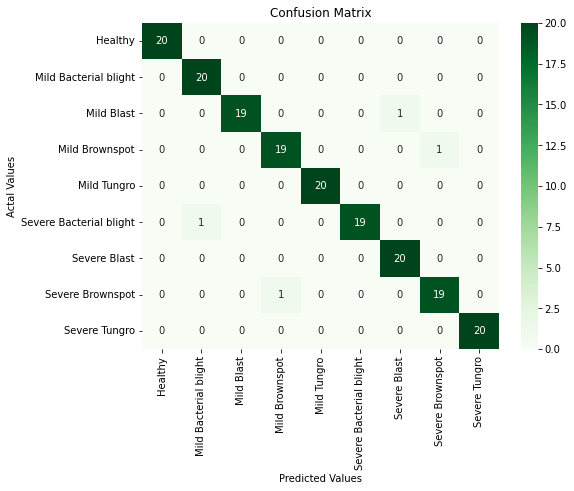

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img('test_img.jfif',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 54.,  91.,  48.],
        [ 52.,  89.,  46.],
        [ 47.,  79.,  42.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       [[ 53.,  90.,  47.],
        [ 51.,  88.,  45.],
        [ 46.,  78.,  41.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       [[ 51.,  86.,  46.],
        [ 49.,  84.,  44.],
        [ 42.,  74.,  37.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       ...,

       [[ 96., 140., 117.],
        [ 98., 143., 120.],
        [109., 154., 131.],
        ...,
        [170., 197., 118.],
        [154., 206., 105.],
        [155., 207., 106.]],

       [[103., 151., 127.],
        [106., 154., 130.],
        [115., 165., 140.],
        ...,
        [171., 198., 119.],
        [154., 206., 105.],
        [155., 207., 106.]],

       [[108., 158., 133.],
        [111., 161., 136.],
        [118., 1

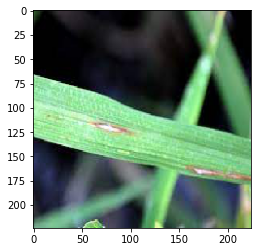

In [ ]:
from matplotlib.pyplot import imshow
imshow(img)

In [ ]:
x=x/255

In [ ]:
x


array([[[0.21176471, 0.35686275, 0.1882353 ],
        [0.20392157, 0.34901962, 0.18039216],
        [0.18431373, 0.30980393, 0.16470589],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.20784314, 0.3529412 , 0.18431373],
        [0.2       , 0.34509805, 0.1764706 ],
        [0.18039216, 0.30588236, 0.16078432],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.2       , 0.3372549 , 0.18039216],
        [0.19215687, 0.32941177, 0.17254902],
        [0.16470589, 0.2901961 , 0.14509805],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.3764706 , 0.54901963, 0.45882353],
        [0.38431373, 0.56078434, 0.47058824],
        [0.42745098, 0

In [ ]:
import cv2
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [ ]:
x.shape

(1, 224, 224, 3)

In [ ]:
model.predict(x)

1/1 [==============================] - 1s 684ms/step


array([[0.0000000e+00, 6.4501312e-13, 1.0000000e+00, 4.2791863e-21,
        2.9035096e-33, 1.6430760e-16, 1.3273155e-09, 4.4135740e-21,
        6.9884948e-34]], dtype=float32)

In [ ]:
a=model.predict(x)

1/1 [==============================] - 0s 73ms/step


In [ ]:
a.argmax()

2

In [ ]:
folders

['C:\\Users\\HOME\\Desktop\\train\\Healthy',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Bacterial blight',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Blast',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Brownspot',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Tungro',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Bacterial blight',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Blast',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Brownspot',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Tungro']